<a href="https://colab.research.google.com/github/ngoan22mse23088/GraduationThesis/blob/master/Copy_of_Hot_Rolled_Steel_Surface_Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic Detection of Hot-Rolled Steel Strips Surface Defects using Convolutional Neural Network
#### This project aims to automatically detect surface defects in Hot-Rolled Steel Strips such as rolled-in scale, patches, crazing, pitted surface, inclusion and scratches (as depicted in the image below). A Convolutional Neural Network Model is developed and trained on the NEU Metal Surface Defects Database which contains 1800 grayscale images with 300 samples of each of the six different kinds of surface defects.

## 1. Importing Relevant Libraries

In [1]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=48ab7cf5929d42d42c84d524c6f1c1867679fa46b53d2f2ee4ccefe365d90842
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files
#from keras.utils import np_utils
from keras.utils import to_categorical
from keras.preprocessing.image import array_to_img, img_to_array, load_img

## 2. Importing the NEU Metal Surface Defect Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/Surface-Defect-Detection-in-Hot-Rolled-Steel-Strips-master'))

In [ ]:
print(os.listdir('/content/drive/MyDrive/Surface-Defect-Detection-in-Hot-Rolled-Steel-Strips-master/NEU Metal Surface Defects Data'))

In [7]:
!cp -r "/content/drive/MyDrive/Surface-Defect-Detection-in-Hot-Rolled-Steel-Strips-master/NEU Metal Surface Defects Data" "/content/neu-metal-surface-defects-data"

In [8]:
import os
print(os.listdir('/content/neu-metal-surface-defects-data'))

['test', 'valid', 'train']


In [9]:
train_dir = '/content/neu-metal-surface-defects-data/train'
val_dir = '/content/neu-metal-surface-defects-data/valid'
test_dir='/content/neu-metal-surface-defects-data/test'
# print("Path: ",os.listdir("/content/neu-metal-surface-defects-data/NEU Metal Surface Defects Data"))
print("Train: ",os.listdir("/content/neu-metal-surface-defects-data/train"))
print("Test: ",os.listdir("/content/neu-metal-surface-defects-data/test"))
print("Validation: ",os.listdir("/content/neu-metal-surface-defects-data/valid"))

Train:  ['Pitted', 'Crazing', 'Patches', 'Inclusion', 'Rolled', 'Scratches']
Test:  ['Pitted', 'Crazing', 'Patches', 'Inclusion', 'Rolled', 'Scratches']
Validation:  ['Pitted', 'Crazing', 'Patches', 'Inclusion', 'Rolled', 'Scratches']


In [ ]:
/content/sample_data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### For each Class, the Training Data includes 276 Images, Validation & Test sets have 12 images each.

In [12]:
print("Inclusion Defect")
print("Training Images:",len(os.listdir(train_dir+'/'+'Inclusion')))
print("Testing Images:",len(os.listdir(test_dir+'/'+'Inclusion')))
print("Validation Images:",len(os.listdir(val_dir+'/'+'Inclusion')))

Inclusion Defect
Training Images: 276
Testing Images: 12
Validation Images: 12


## 3. Data Pre-processing

In [13]:
# Rescaling all Images by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training images are put in batches of 10
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Validation images are put in batches of 10
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


#### Setting upper Limit of Max 98% training accuracy

In [14]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True

## 4. Defining the CNN Architecture

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

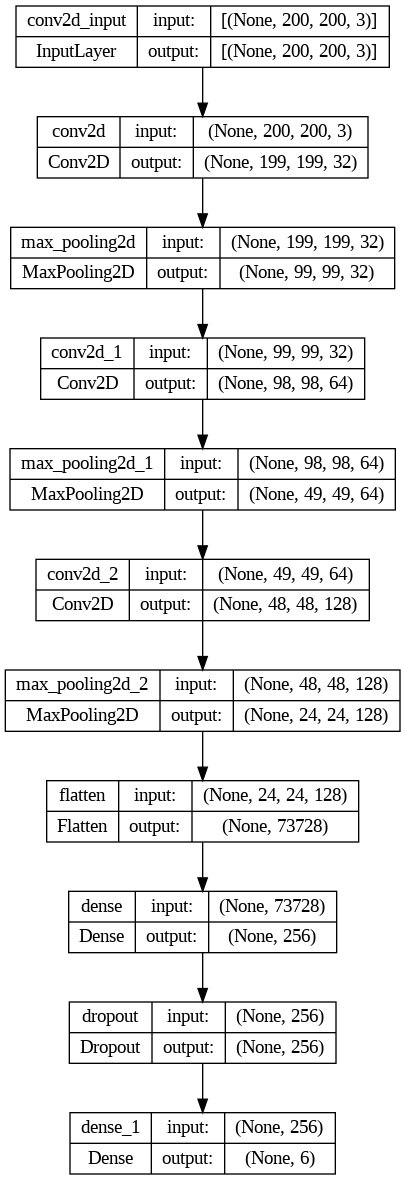

In [17]:
tf.keras.utils.plot_model(
    model,
    to_file='cnn_architecture.png',
    show_shapes=True)

## 5. Training the Defined CNN Model

In [18]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/20
166/166 [==============================] - 175s 1s/step - loss: 1.7709 - accuracy: 0.2941 - val_loss: 1.1582 - val_accuracy: 0.5972
Epoch 2/20
166/166 [==============================] - 163s 982ms/step - loss: 1.1930 - accuracy: 0.5362 - val_loss: 0.6746 - val_accuracy: 0.7917
Epoch 3/20
166/166 [==============================] - 162s 974ms/step - loss: 0.8807 - accuracy: 0.6932 - val_loss: 0.7515 - val_accuracy: 0.7361
Epoch 4/20
166/166 [==============================] - 179s 1s/step - loss: 0.7239 - accuracy: 0.7597 - val_loss: 0.3388 - val_accuracy: 0.8611
Epoch 5/20
166/166 [==============================] - 169s 1s/step - loss: 0.5708 - accuracy: 0.8019 - val_loss: 0.4068 - val_accuracy: 0.8889
Epoch 6/20
166/166 [==============================] - 167s 1s/step - loss: 0.4921 - accuracy: 0.8412 - val_loss: 0.0631 - val_accuracy: 0.9861
Epoch 7/20
166/166 [==============================] - 163s 981ms/step - loss: 0.4610 - accuracy: 0.8605 - val_loss: 0.0994 - val_accurac

## 6. Analysing the Accuracy & the Loss Curves

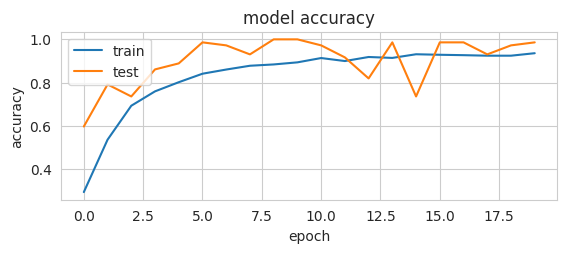

In [19]:
sns.set_style("whitegrid")
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

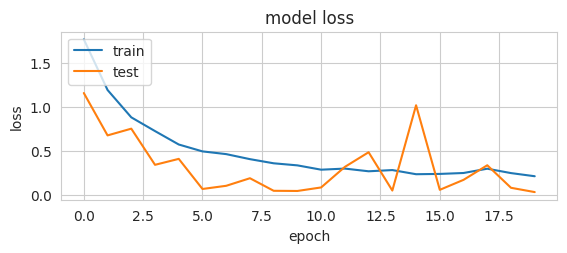

In [20]:
sns.set_style("whitegrid")
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 7. Test Result visualization

In [21]:
# Loading file names & their respective target labels into numpy array
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
x_test, y_test,target_labels = load_dataset(test_dir)
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [22]:
#y_test = np_utils.to_categorical(y_test,no_of_classes)
y_test = to_categorical(y_test,no_of_classes)

In [23]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [24]:
x_test = x_test.astype('float32')/255

## Results of Hot-Rolled Steel Strips Surface Defect Detection

3/3 [==============================] - 1s 327ms/step


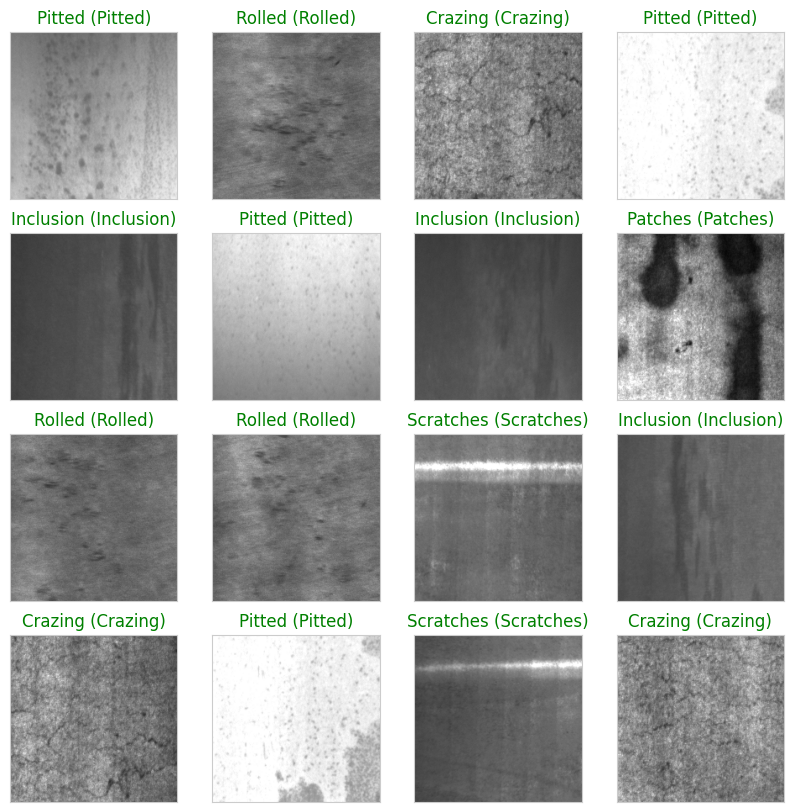

In [25]:
# Plotting Random Sample of test images, their predicted labels, and ground truth
y_pred = model.predict(x_test)
fig = plt.figure(figsize=(10, 10))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))